In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [55]:
(x_train_original, y_train_original), (x_test_original, y_test_original) = cifar100.load_data(label_mode='fine')

In [56]:
# model configuration
batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 100
no_epochs = 5
optimizer = Adam()
validation_split = 0.2
verbosity = 1

In [57]:
# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

In [58]:
# Parse numbers as floats
x_train_original = x_train_original.astype('float32')
x_test_original = x_test_original.astype('float32')

# Normalize data
x_train_original = x_train_original / 255
x_test_original = x_test_original / 255

## a) Using two convolutional layers, explore the impact on different choices for the number of nodes and filter sizes for the two layers. Summarize your observations.

### try 32, 64 nodes

Epoch 1/5
800/800 [==============================] - 11s 14ms/step - loss: 3.6727 - accuracy: 0.1516 - val_loss: 3.1673 - val_accuracy: 0.2403
Epoch 2/5
800/800 [==============================] - 11s 14ms/step - loss: 2.8048 - accuracy: 0.3078 - val_loss: 2.8851 - val_accuracy: 0.2980
Epoch 3/5
800/800 [==============================] - 11s 14ms/step - loss: 2.2085 - accuracy: 0.4319 - val_loss: 2.8433 - val_accuracy: 0.3119
Epoch 4/5
800/800 [==============================] - 11s 14ms/step - loss: 1.5894 - accuracy: 0.5768 - val_loss: 3.1776 - val_accuracy: 0.3018
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 3.6748 - accuracy: 0.2904
Test loss: 3.6748015880584717 / Test accuracy: 0.2903999984264374


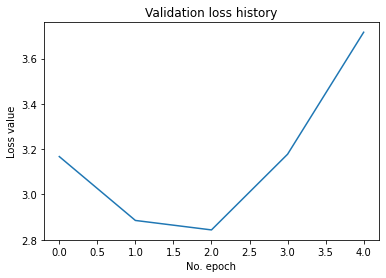

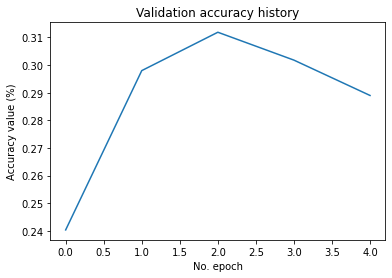

In [36]:
# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

# Compile the model
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

# Fit data to model
history = model.fit(x_train_original, y_train_original,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)

score = model.evaluate(x_test_original, y_test_original, verbose=1)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualize history
# Plot history: Loss
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

## try 32, 32 nodes

Epoch 1/5
800/800 [==============================] - 7s 9ms/step - loss: 3.8249 - accuracy: 0.1256 - val_loss: 3.3709 - val_accuracy: 0.1940
Epoch 2/5
800/800 [==============================] - 7s 9ms/step - loss: 3.0257 - accuracy: 0.2591 - val_loss: 3.0282 - val_accuracy: 0.2568
Epoch 3/5
800/800 [==============================] - 7s 9ms/step - loss: 2.5599 - accuracy: 0.3548 - val_loss: 2.9599 - val_accuracy: 0.2760
Epoch 4/5
800/800 [==============================] - 7s 9ms/step - loss: 2.1691 - accuracy: 0.4384 - val_loss: 3.0211 - val_accuracy: 0.2874
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 3.1720 - accuracy: 0.2843
Test loss: 3.171962022781372 / Test accuracy: 0.2842999994754791


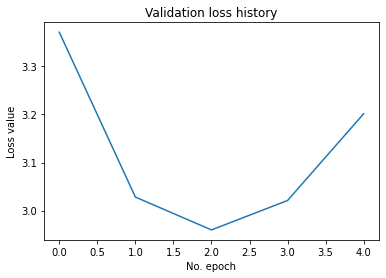

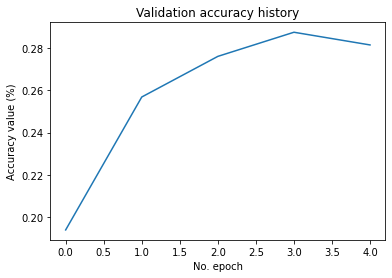

In [42]:
(x_train_original, y_train_original), (x_test_original, y_test_original) = cifar100.load_data(label_mode='fine')

batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 100
no_epochs = 5
optimizer = Adam()
validation_split = 0.2
verbosity = 1

input_shape = (img_width, img_height, img_num_channels)
x_train_original = x_train_original.astype('float32')
x_test_original = x_test_original.astype('float32')
x_train_original = x_train_original / 255
x_test_original = x_test_original / 255

model1 = Sequential()
model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(no_classes, activation='softmax'))

# Compile the model
model1.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

# Fit data to model
history1 = model1.fit(x_train_original, y_train_original,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)

score1 = model1.evaluate(x_test_original, y_test_original, verbose=1)
print(f'Test loss: {score1[0]} / Test accuracy: {score1[1]}')

# Visualize history
# Plot history: Loss
plt.plot(history1.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history1.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

try 64, 128 nodes

Epoch 1/5
800/800 [==============================] - 19s 24ms/step - loss: 3.7803 - accuracy: 0.1350 - val_loss: 3.3535 - val_accuracy: 0.2081
Epoch 2/5
800/800 [==============================] - 19s 24ms/step - loss: 2.9820 - accuracy: 0.2725 - val_loss: 2.9898 - val_accuracy: 0.2753
Epoch 3/5
800/800 [==============================] - 19s 24ms/step - loss: 2.5056 - accuracy: 0.3656 - val_loss: 2.9332 - val_accuracy: 0.2889
Epoch 4/5
800/800 [==============================] - 20s 24ms/step - loss: 2.0151 - accuracy: 0.4706 - val_loss: 3.0133 - val_accuracy: 0.2980
Epoch 5/5
313/313 [==============================] - 2s 6ms/step - loss: 3.3203 - accuracy: 0.2938
Test loss: 3.3202502727508545 / Test accuracy: 0.2937999963760376


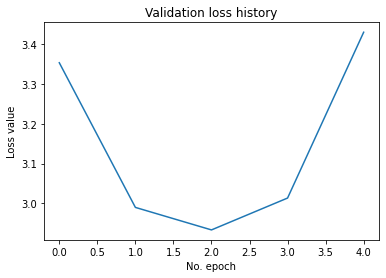

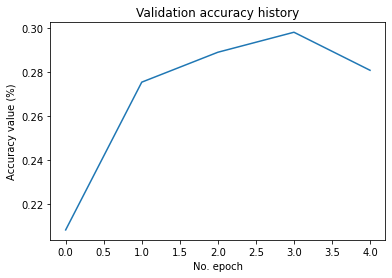

In [48]:
(x_train_original, y_train_original), (x_test_original, y_test_original) = cifar100.load_data(label_mode='fine')

batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 100
no_epochs = 5
optimizer = Adam()
validation_split = 0.2
verbosity = 1

input_shape = (img_width, img_height, img_num_channels)
x_train_original = x_train_original.astype('float32')
x_test_original = x_test_original.astype('float32')
x_train_original = x_train_original / 255
x_test_original = x_test_original / 255

model2 = Sequential()
model2.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model2.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(no_classes, activation='softmax'))

# Compile the model
model2.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

# Fit data to model
history2 = model2.fit(x_train_original, y_train_original,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)

score2 = model2.evaluate(x_test_original, y_test_original, verbose=1)
print(f'Test loss: {score2[0]} / Test accuracy: {score2[1]}')

# Visualize history
# Plot history: Loss
plt.plot(history2.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history2.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

 try 128, 256 nodes

Epoch 1/5
800/800 [==============================] - 11s 14ms/step - loss: 3.7721 - accuracy: 0.1352 - val_loss: 3.2962 - val_accuracy: 0.2165
Epoch 2/5
800/800 [==============================] - 11s 14ms/step - loss: 2.9249 - accuracy: 0.2839 - val_loss: 2.9861 - val_accuracy: 0.2738
Epoch 3/5
800/800 [==============================] - 11s 14ms/step - loss: 2.3813 - accuracy: 0.3945 - val_loss: 2.9406 - val_accuracy: 0.2895
Epoch 4/5
800/800 [==============================] - 11s 14ms/step - loss: 1.8143 - accuracy: 0.5207 - val_loss: 3.1393 - val_accuracy: 0.2842
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 3.6172 - accuracy: 0.2776
Test loss: 3.6172280311584473 / Test accuracy: 0.2775999903678894


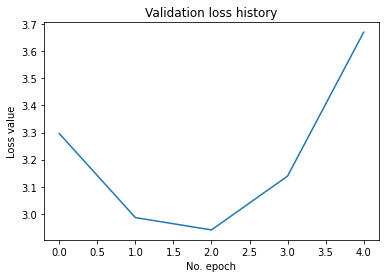

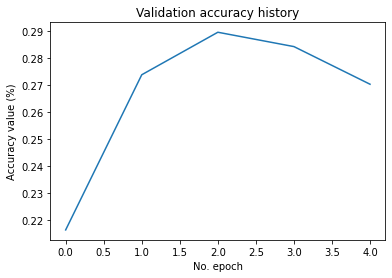

In [54]:
(x_train_original, y_train_original), (x_test_original, y_test_original) = cifar100.load_data(label_mode='fine')

batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 100
no_epochs = 5
optimizer = Adam()
validation_split = 0.2
verbosity = 1

input_shape = (img_width, img_height, img_num_channels)
x_train_original = x_train_original.astype('float32')
x_test_original = x_test_original.astype('float32')
x_train_original = x_train_original / 255
x_test_original = x_test_original / 255

model3 = Sequential()
model3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dense(no_classes, activation='softmax'))

# Compile the model
model3.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

# Fit data to model
history3 = model3.fit(x_train_original, y_train_original,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)

score3 = model3.evaluate(x_test_original, y_test_original, verbose=1)
print(f'Test loss: {score3[0]} / Test accuracy: {score3[1]}')

# Visualize history
# Plot history: Loss
plt.plot(history3.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history3.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

## try (5,5) kernel with the best obtained model

Epoch 1/5
800/800 [==============================] - 17s 22ms/step - loss: 3.9378 - accuracy: 0.1032 - val_loss: 3.5067 - val_accuracy: 0.1754
Epoch 2/5
800/800 [==============================] - 17s 21ms/step - loss: 3.2786 - accuracy: 0.2155 - val_loss: 3.2479 - val_accuracy: 0.2262
Epoch 3/5
800/800 [==============================] - 17s 21ms/step - loss: 2.9606 - accuracy: 0.2720 - val_loss: 3.1625 - val_accuracy: 0.2427
Epoch 4/5
800/800 [==============================] - 17s 21ms/step - loss: 2.7205 - accuracy: 0.3225 - val_loss: 3.0843 - val_accuracy: 0.2647
Epoch 5/5
313/313 [==============================] - 2s 6ms/step - loss: 3.1997 - accuracy: 0.2651
Test loss: 3.1996843814849854 / Test accuracy: 0.26510000228881836


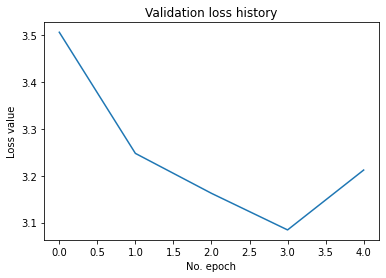

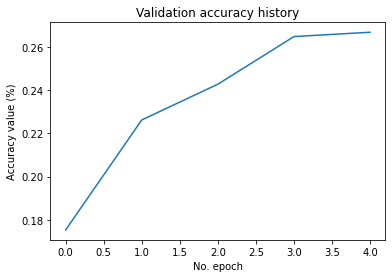

In [59]:
model4 = Sequential()
model4.add(Conv2D(64, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model4.add(Conv2D(128, kernel_size=(5, 5), activation='relu'))
model4.add(Flatten())
model4.add(Dense(128, activation='relu'))
model4.add(Dense(no_classes, activation='softmax'))

# Compile the model
model4.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

# Fit data to model
history4 = model4.fit(x_train_original, y_train_original,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)

score4 = model4.evaluate(x_test_original, y_test_original, verbose=1)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualize history
# Plot history: Loss
plt.plot(history4.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history4.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

## We tried 4 different pairs of nodes for 2 convolutional layers. The best result showed (64, 128), test accuracy 29.38%. Then we tried kernel size (5,5) and got lower test accuracy(26.5 %). I think that the reason why accuracy decreased is that we use low resolution images. (5, 5) and (7, 7) kernels are more appropriate for high resolution images.

## b) For the hyperparameters for the layers that you determined in part (a), experiment with a higher number of epochs. Summarize your observations.

Epoch 1/10
800/800 [==============================] - 19s 24ms/step - loss: 3.6822 - accuracy: 0.1508 - val_loss: 3.2699 - val_accuracy: 0.2222
Epoch 2/10
800/800 [==============================] - 19s 24ms/step - loss: 2.8782 - accuracy: 0.2962 - val_loss: 2.9961 - val_accuracy: 0.2785
Epoch 3/10
800/800 [==============================] - 19s 24ms/step - loss: 2.2935 - accuracy: 0.4122 - val_loss: 3.0145 - val_accuracy: 0.2807
Epoch 4/10
800/800 [==============================] - 19s 24ms/step - loss: 1.6623 - accuracy: 0.5590 - val_loss: 3.2888 - val_accuracy: 0.2769
Epoch 5/10
800/800 [==============================] - 19s 24ms/step - loss: 1.0134 - accuracy: 0.7229 - val_loss: 3.9438 - val_accuracy: 0.2718
Epoch 6/10
800/800 [==============================] - 19s 24ms/step - loss: 0.5280 - accuracy: 0.8543 - val_loss: 5.1849 - val_accuracy: 0.2626
Epoch 7/10
800/800 [==============================] - 19s 24ms/step - loss: 0.2869 - accuracy: 0.9187 - val_loss: 6.1723 - val_accuracy:

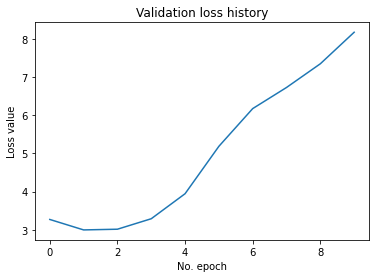

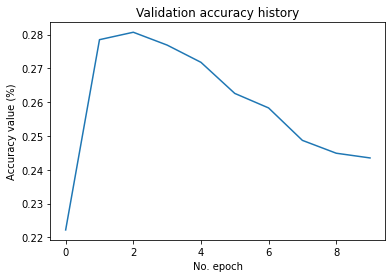

Epoch 1/20
800/800 [==============================] - 19s 24ms/step - loss: 3.7888 - accuracy: 0.1335 - val_loss: 3.2820 - val_accuracy: 0.2177
Epoch 2/20
800/800 [==============================] - 19s 24ms/step - loss: 2.9614 - accuracy: 0.2749 - val_loss: 2.9987 - val_accuracy: 0.2680
Epoch 3/20
800/800 [==============================] - 19s 24ms/step - loss: 2.4246 - accuracy: 0.3808 - val_loss: 2.9319 - val_accuracy: 0.2904
Epoch 4/20
800/800 [==============================] - 19s 24ms/step - loss: 1.8847 - accuracy: 0.5016 - val_loss: 3.1193 - val_accuracy: 0.2938
Epoch 5/20
800/800 [==============================] - 19s 24ms/step - loss: 1.3360 - accuracy: 0.6374 - val_loss: 3.6100 - val_accuracy: 0.2792
Epoch 6/20
800/800 [==============================] - 19s 24ms/step - loss: 0.8637 - accuracy: 0.7602 - val_loss: 4.4077 - val_accuracy: 0.2703
Epoch 7/20
800/800 [==============================] - 19s 24ms/step - loss: 0.5189 - accuracy: 0.8523 - val_loss: 5.1999 - val_accuracy:

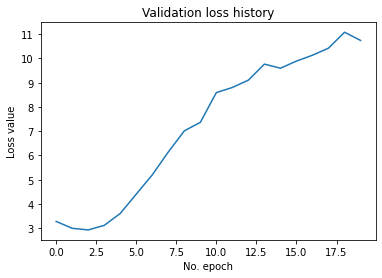

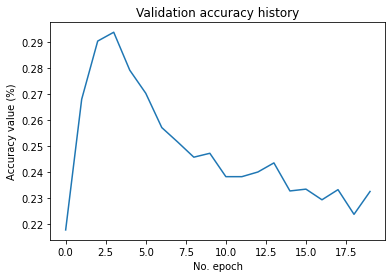

Epoch 1/30
800/800 [==============================] - 19s 24ms/step - loss: 4.0560 - accuracy: 0.0819 - val_loss: 3.6512 - val_accuracy: 0.1489
Epoch 2/30
800/800 [==============================] - 19s 24ms/step - loss: 3.3313 - accuracy: 0.1988 - val_loss: 3.2476 - val_accuracy: 0.2226
Epoch 3/30
800/800 [==============================] - 19s 24ms/step - loss: 2.9242 - accuracy: 0.2722 - val_loss: 3.0489 - val_accuracy: 0.2574
Epoch 4/30
800/800 [==============================] - 19s 24ms/step - loss: 2.5943 - accuracy: 0.3341 - val_loss: 3.0421 - val_accuracy: 0.2671
Epoch 5/30
800/800 [==============================] - 19s 24ms/step - loss: 2.2719 - accuracy: 0.4024 - val_loss: 3.0828 - val_accuracy: 0.2655
Epoch 6/30
800/800 [==============================] - 19s 24ms/step - loss: 1.9223 - accuracy: 0.4790 - val_loss: 3.2937 - val_accuracy: 0.2623
Epoch 7/30
800/800 [==============================] - 19s 24ms/step - loss: 1.5730 - accuracy: 0.5659 - val_loss: 3.5243 - val_accuracy:

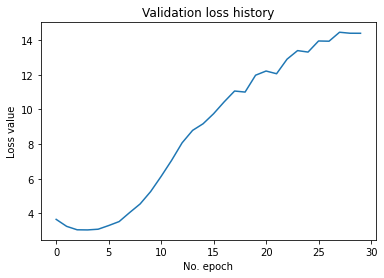

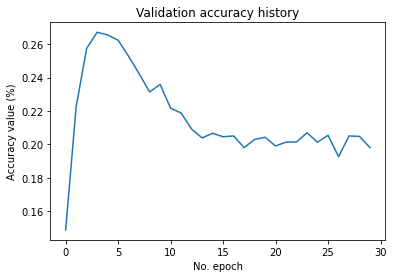

In [60]:
for ep in [10, 20, 30]:
    (x_train_original, y_train_original), (x_test_original, y_test_original) = cifar100.load_data(label_mode='fine')

    batch_size = 50
    img_width, img_height, img_num_channels = 32, 32, 3
    loss_function = sparse_categorical_crossentropy
    no_classes = 100
    no_epochs = ep
    optimizer = Adam()
    validation_split = 0.2
    verbosity = 1

    input_shape = (img_width, img_height, img_num_channels)
    x_train_original = x_train_original.astype('float32')
    x_test_original = x_test_original.astype('float32')
    x_train_original = x_train_original / 255
    x_test_original = x_test_original / 255

    model2 = Sequential()
    model2.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model2.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model2.add(Flatten())
    model2.add(Dense(128, activation='relu'))
    model2.add(Dense(no_classes, activation='softmax'))

    # Compile the model
    model2.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

    # Fit data to model
    history2 = model2.fit(x_train_original, y_train_original,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)

    score2 = model2.evaluate(x_test_original, y_test_original, verbose=1)
    print('Num of epochs:' )
    print(f'Test loss: {score2[0]} / Test accuracy: {score2[1]}')
    print()

    # Visualize history
    # Plot history: Loss
    plt.plot(history2.history['val_loss'])
    plt.title('Validation loss history')
    plt.ylabel('Loss value')
    plt.xlabel('No. epoch')
    plt.show()

    # Plot history: Accuracy
    plt.plot(history2.history['val_accuracy'])
    plt.title('Validation accuracy history')
    plt.ylabel('Accuracy value (%)')
    plt.xlabel('No. epoch')
    plt.show()

## We can see that if number of epochs increases the accuracy decreases. The variance of the model increases and it overfits. To reduce overfitting we can use different regularization techniques. We can also try to add more data to reduce overfitting. So the best number of epochs for our architecture is 5.

## c) Experiment with two more activation functions in the convolutional layers using the optimal number of epochs from part (b). Are you able to improve the validation accuracy?

## use tanh activation

Epoch 1/5
800/800 [==============================] - 19s 24ms/step - loss: 4.3384 - accuracy: 0.0493 - val_loss: 3.9747 - val_accuracy: 0.0894
Epoch 2/5
800/800 [==============================] - 19s 24ms/step - loss: 3.8333 - accuracy: 0.1154 - val_loss: 3.7398 - val_accuracy: 0.1332
Epoch 3/5
800/800 [==============================] - 19s 24ms/step - loss: 3.6336 - accuracy: 0.1480 - val_loss: 3.6676 - val_accuracy: 0.1506
Epoch 4/5
800/800 [==============================] - 19s 24ms/step - loss: 3.5216 - accuracy: 0.1671 - val_loss: 3.6549 - val_accuracy: 0.1497
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 3.6663 - accuracy: 0.1551
Test loss: 3.6663455963134766 / Test accuracy: 0.1551000028848648


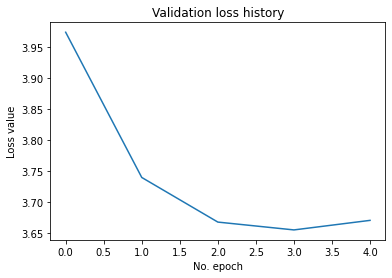

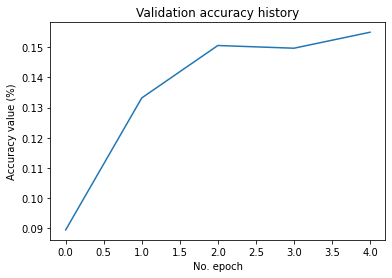

In [61]:
(x_train_original, y_train_original), (x_test_original, y_test_original) = cifar100.load_data(label_mode='fine')

batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 100
no_epochs = 5
optimizer = Adam()
validation_split = 0.2
verbosity = 1

input_shape = (img_width, img_height, img_num_channels)
x_train_original = x_train_original.astype('float32')
x_test_original = x_test_original.astype('float32')
x_train_original = x_train_original / 255
x_test_original = x_test_original / 255

model2 = Sequential()
model2.add(Conv2D(64, kernel_size=(3, 3), activation='tanh', input_shape=input_shape))
model2.add(Conv2D(128, kernel_size=(3, 3), activation='tanh'))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(no_classes, activation='softmax'))

# Compile the model
model2.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

# Fit data to model
history2 = model2.fit(x_train_original, y_train_original,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)

score2 = model2.evaluate(x_test_original, y_test_original, verbose=1)
print(f'Test loss: {score2[0]} / Test accuracy: {score2[1]}')

# Visualize history
# Plot history: Loss
plt.plot(history2.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history2.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

## use elu activation

Epoch 1/5
800/800 [==============================] - 19s 24ms/step - loss: 4.2690 - accuracy: 0.0582 - val_loss: 3.9728 - val_accuracy: 0.0982
Epoch 2/5
800/800 [==============================] - 19s 24ms/step - loss: 3.7613 - accuracy: 0.1272 - val_loss: 3.7368 - val_accuracy: 0.1315
Epoch 3/5
800/800 [==============================] - 19s 24ms/step - loss: 3.5696 - accuracy: 0.1596 - val_loss: 3.6411 - val_accuracy: 0.1564
Epoch 4/5
800/800 [==============================] - 19s 24ms/step - loss: 3.4231 - accuracy: 0.1898 - val_loss: 3.5741 - val_accuracy: 0.1711
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 3.6915 - accuracy: 0.1502
Test loss: 3.69148588180542 / Test accuracy: 0.1501999944448471


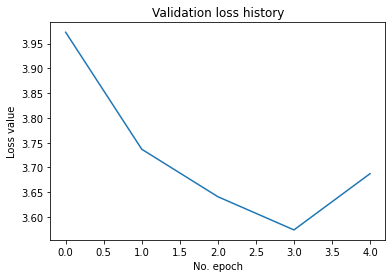

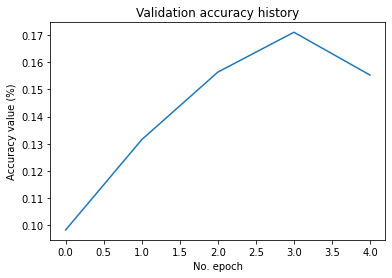

In [63]:
(x_train_original, y_train_original), (x_test_original, y_test_original) = cifar100.load_data(label_mode='fine')

batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 100
no_epochs = 5
optimizer = Adam()
validation_split = 0.2
verbosity = 1

input_shape = (img_width, img_height, img_num_channels)
x_train_original = x_train_original.astype('float32')
x_test_original = x_test_original.astype('float32')
x_train_original = x_train_original / 255
x_test_original = x_test_original / 255

model2 = Sequential()
model2.add(Conv2D(64, kernel_size=(3, 3), activation='elu', input_shape=input_shape))
model2.add(Conv2D(128, kernel_size=(3, 3), activation='elu'))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(no_classes, activation='softmax'))

# Compile the model
model2.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

# Fit data to model
history2 = model2.fit(x_train_original, y_train_original,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)

score2 = model2.evaluate(x_test_original, y_test_original, verbose=1)
print(f'Test loss: {score2[0]} / Test accuracy: {score2[1]}')

# Visualize history
# Plot history: Loss
plt.plot(history2.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history2.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

## As we see from previous cell we are notable to improve accuracy using 'tanh' and 'elu' activation functions. Maybe this result depends on our simple architecture, maybe 'relu' is more suitable for our data.

## d) For the result in (c), calculate test accuracy for each class. Do you observe lower accuracy for any specific class or classes? Do you observe higher accuracy for any specific class or classes?

Epoch 1/5
800/800 [==============================] - 19s 24ms/step - loss: 3.8614 - accuracy: 0.1193 - val_loss: 3.3723 - val_accuracy: 0.1985
Epoch 2/5
800/800 [==============================] - 19s 24ms/step - loss: 3.0328 - accuracy: 0.2595 - val_loss: 3.0591 - val_accuracy: 0.2677
Epoch 3/5
800/800 [==============================] - 19s 24ms/step - loss: 2.4670 - accuracy: 0.3778 - val_loss: 2.9428 - val_accuracy: 0.2950
Epoch 4/5
800/800 [==============================] - 19s 24ms/step - loss: 1.8791 - accuracy: 0.5063 - val_loss: 3.1302 - val_accuracy: 0.2905
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 3.6972 - accuracy: 0.2732
Test loss: 3.697244644165039 / Test accuracy: 0.27320000529289246


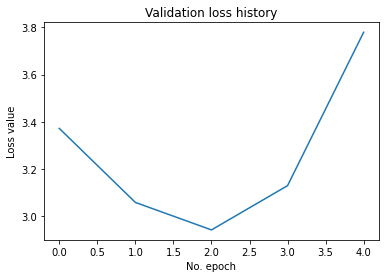

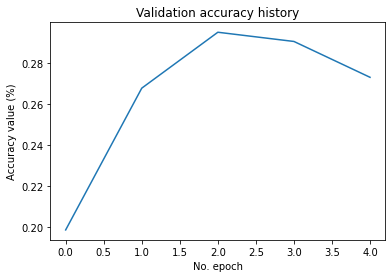

In [64]:
# retrain the best model
(x_train_original, y_train_original), (x_test_original, y_test_original) = cifar100.load_data(label_mode='fine')

batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 100
no_epochs = 5
optimizer = Adam()
validation_split = 0.2
verbosity = 1

input_shape = (img_width, img_height, img_num_channels)
x_train_original = x_train_original.astype('float32')
x_test_original = x_test_original.astype('float32')
x_train_original = x_train_original / 255
x_test_original = x_test_original / 255

model2 = Sequential()
model2.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model2.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(no_classes, activation='softmax'))

# Compile the model
model2.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

# Fit data to model
history2 = model2.fit(x_train_original, y_train_original,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)

score2 = model2.evaluate(x_test_original, y_test_original, verbose=1)
print(f'Test loss: {score2[0]} / Test accuracy: {score2[1]}')

# Visualize history
# Plot history: Loss
plt.plot(history2.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history2.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

In [65]:
# calculate test accuracy for each class
from sklearn.metrics import classification_report
y_pred = model2.predict_classes(x_test_original)
print(classification_report(y_test_original, y_pred))


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       0.48      0.48      0.48       100
           1       0.33      0.45      0.38       100
           2       0.14      0.23      0.17       100
           3       0.15      0.07      0.10       100
           4       0.11      0.15      0.13       100
           5       0.18      0.26      0.22       100
           6       0.16      0.39      0.22       100
           7       0.31      0.23      0.26       100
           8       0.53      0.46      0.49       100
           9       0.29      0.42      0.34       100
          10       0.22      0.24      0.23       100
          11     

In [66]:
cifar100_labels = [
'apple', 
'aquarium_fish',
'baby',
'bear',
'beaver',
'bed',
'bee',
'beetle',
'bicycle',
'bottle',
'bowl',
'boy',
'bridge',
'bus',
'butterfly',
'camel',
'can',
'castle',
'caterpillar',
'cattle',
'chair',
'chimpanzee',
'clock',
'cloud',
'cockroach',
'couch',
'crab',
'crocodile',
'cup',
'dinosaur',
'dolphin',
'elephant',
'flatfish',
'forest',
'fox',
'girl',
'hamster',
'house',
'kangaroo',
'computer_keyboard',
'lamp',
'lawn_mower',
'leopard',
'lion',
'lizard',
'lobster',
'man',
'maple_tree',
'motorcycle',
'mountain',
'mouse',
'mushroom',
'oak_tree',
'orange',
'orchid',
'otter',
'palm_tree',
'pear',
'pickup_truck',
'pine_tree',
'plain',
'plate',
'poppy',
'porcupine',
'possum',
'rabbit',
'raccoon',
'ray',
'road',
'rocket',
'rose',
'sea',
'seal',
'shark',
'shrew',
'skunk',
'skyscraper',
'snail',
'snake',
'spider',
'squirrel',
'streetcar',
'sunflower',
'sweet_pepper',
'table',
'tank',
'telephone',
'television',
'tiger',
'tractor',
'train',
'trout',
'tulip',
'turtle',
'wardrobe',
'whale',
'willow_tree',
'wolf',
'woman',
'worm',
]

In [69]:
# lower acc
print(cifar100_labels[64]) # acc=0.06
print(cifar100_labels[80]) # acc=0.06
print(cifar100_labels[72]) # acc=0.09
print()
# higher acc
print(cifar100_labels[60]) # acc=0.65
print(cifar100_labels[94]) # acc=0.61

possum
squirrel
seal

plain
wardrobe


## Yes, we really observe classes with lower and higher accuracies. Class labels we can see in the cell above. We can assume that classes with lower accuracies(animals) are similar to another animal classes and they are more often misclassified by our very simple model. 'Plain' and 'Wardrobe' classes are more specific and our model recognizes them better.